# PXD009019 Low SpC Cutoff

## See where to set an average SpC cutoff for quantification

Load the R libraries and read in the data prepared in Excel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  AverageSpC = col_double(),
  FracMissing = col_double()
)


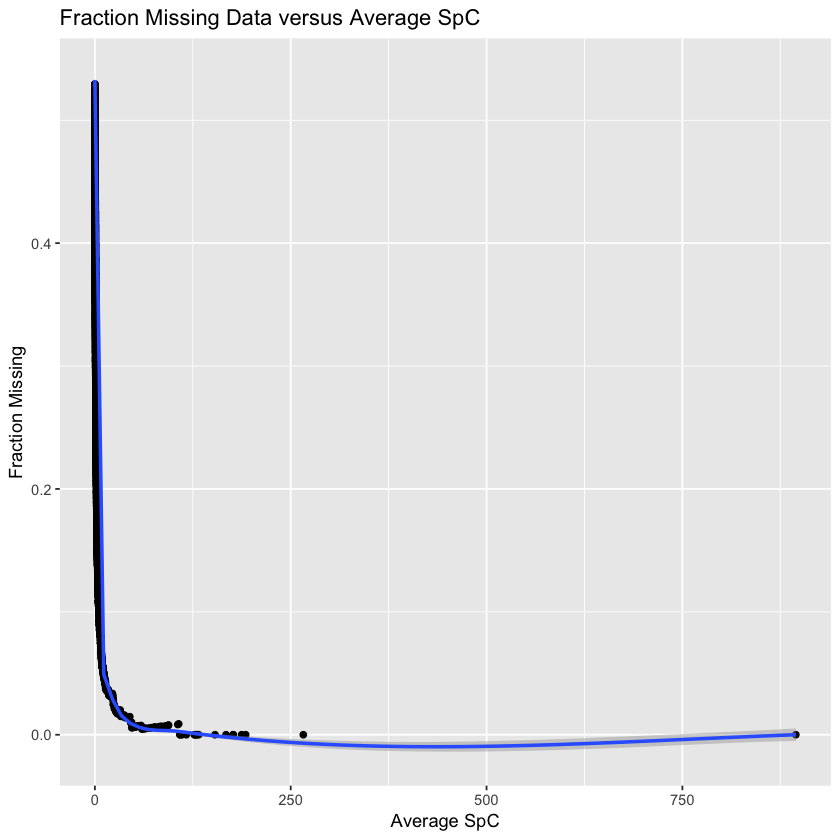

In [1]:
# load the ggplot libraries
library(tidyverse)

# read in the data
temp <- read_tsv("average_fractionMissing.txt")

# make a basic plot
ggplot(temp, aes(x = AverageSpC, y = FracMissing)) +
  geom_point() +
  geom_smooth(method = "loess", span = 0.05) + 
  ggtitle("Fraction Missing Data versus Average SpC") + 
  labs(x = "Average SpC", y = "Fraction Missing")

## Sharp rise as average SpC gets small

We see a sharp rise in the fraction of missing data as the average SpC decreases. We need to expand the x-axis closer to the origin to see at what average SpC we start to see the sharp rise.

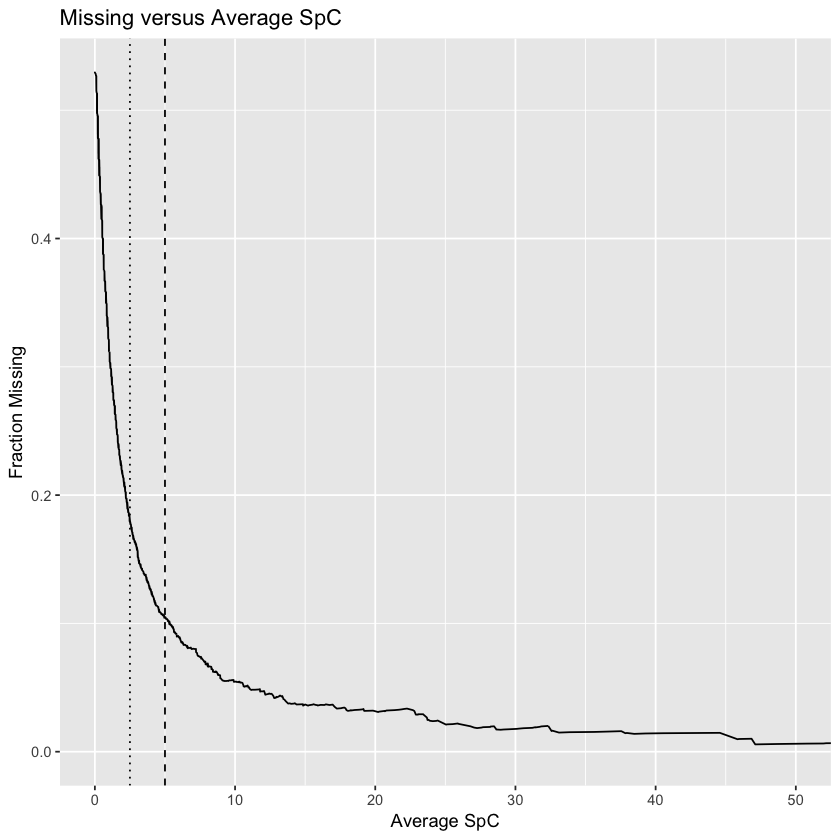

In [2]:
# expanded x-axis plot
ggplot(temp, aes(x = AverageSpC, y = FracMissing)) +
  coord_cartesian(xlim = c(0, 50)) +
  geom_line() + 
#  geom_smooth(method = "loess", span = 0.05) +
  ggtitle("Missing versus Average SpC") + 
  labs( x = "Average SpC", y = "Fraction Missing") + 
  geom_vline(xintercept = 2.5, linetype = "dotted") +
  geom_vline(xintercept = 5.0, linetype = "dashed")

## Be conservative or cast a wide net?

The rise in missing data seems to start at an average SpC of about 5.0 (the dashed line). That is a relatively high average SpC cutoff and it would reduce the number of testable proteins a lot. We have 2262 total non-contaminant proteins that were confidently identified. The number with an average SpC of 5 or greater is only 414. We often use an average SpC cutoff of 2.5 (the dotted line) in spectral counting experiments. That increases the number of testable proteins to 669. That is about the best we can do with this data. The single LC runs and the wide dynamic range of the proteome result in too many proteins having very small spectral counts or zeros. At the cutoff of 5, there is 10% missing data. At the 2.5 cutoff, the missing data has risen to 20%. Overall there are 53% missing data associated with the 2262 proteins.

Another way to look at this is to compute the fraction of the total SpC that are above the two SpC cutoff choices. With the 5.0 cutoff, we would include 81.9% of the total counts. The 2.5 cutoff would include 89.3% of the total SpC counts.

### The average SpC cutoff of 2.5 is a good choice to try.

In [3]:
sessionInfo()

R version 3.5.3 (2019-03-11)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.5

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] forcats_0.4.0   stringr_1.4.0   dplyr_0.8.1     purrr_0.3.2    
[5] readr_1.3.1     tidyr_0.8.3     tibble_2.1.1    ggplot2_3.1.1  
[9] tidyverse_1.2.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       cellranger_1.1.0 plyr_1.8.4       pillar_1.4.0    
 [5] compiler_3.5.3   base64enc_0.1-3  tools_3.5.3      digest_0.6.19   
 [9] uuid_0.1-2       lubridate_1.7.4  jsonlite_1.6     evaluate_0.13   
[13] nlme_3.1-140     gtable_0.3.0     lattice_0.20-38  pkgconfig_2.0.2 
[17] r